<h2> Decision tree </h2>

Decision tree is a structure to get the results based on rules, and the values used in these rules are defined by machine learning

In [40]:
#import pandas
import pandas as pd
#import dataset iris
from sklearn.datasets import load_iris

In [41]:
#show data
data_iris = load_iris()
data_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
# transforming data into a dataframe
iris = pd.DataFrame(data_iris.data)
iris.columns = data_iris.feature_names
iris['target'] = data_iris.target
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# Selecting only columns of petal and its targets
iris1 = iris[['petal length (cm)','petal width (cm)','target']] 
iris1 = iris1[iris1['target'].isin([0,1])]
iris1.head(5)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [44]:
# separating x and y
x  = iris1.drop('target', axis=1)
y = iris1.target

In [45]:
# separating train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(f"len x: {len(x)} & len x_train: {len(x_train)} & len x_test: {len(x_test)}")

len x: 100 & len x_train: 67 & len x_test: 33


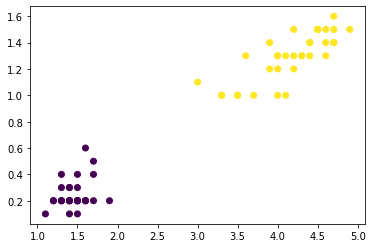

In [46]:
#visualizing the data 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)
#ax.set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))
plt.show()

In [47]:
#importing the decision tree
from sklearn import tree
#creating the classifier
clf = tree.DecisionTreeClassifier()
#fit with the data of train
clf = clf.fit(x_train, y_train)
#verify the score
clf.score(x_train, y_train)

1.0

[Text(167.4, 163.07999999999998, 'X[0] <= 2.45\ngini = 0.497\nsamples = 67\nvalue = [31, 36]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]')]

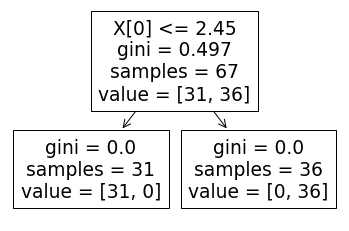

In [48]:
#visualizing the tree
tree.plot_tree(clf)

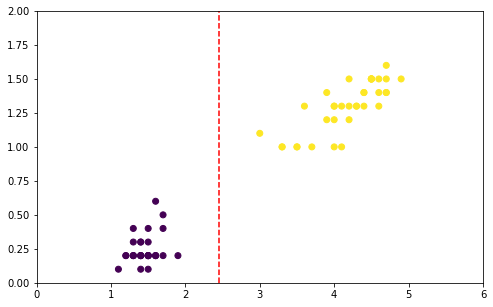

In [49]:
# confirming with the plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)
ax.set(xlim=(0,6), ylim=(0,2)) #xticks=np.arange(1,8)

ax.plot([2.45,2.45],[0,2],'--r')

plt.show()

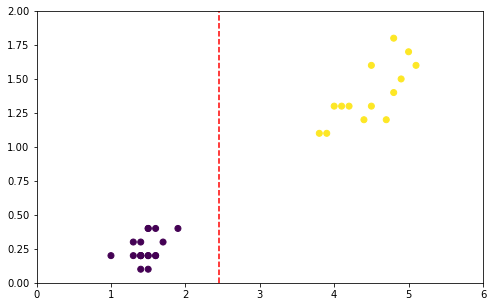

In [50]:
# confirming for the test data
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_test['petal length (cm)'], x_test['petal width (cm)'], c=y_test)
ax.set(xlim=(0,6), ylim=(0,2)) #xticks=np.arange(1,8)

ax.plot([2.45,2.45],[0,2],'--r')

plt.show()